# 103590450 四資三 馬茂源
# 備註:後面區塊部分因為使用較大的資料會花上不少時間，另外，我沒有把全部的期刊爬下來，因為太多了

# Using a programming language that you are familiar with, such as C++ or Java, implement two frequent mining algorithms introduced in this chapter:
* (1) Apriori, 
* (2) FP-Growth. 

# Compare the performance of each algorithm with various kinds of large data sets. 
# Write a report to analyze the situations (e.g., 
* data size, 
* data distribution
* minimal support threshold setting
* pattern density
## where one algorithm may perform better than the others, and state why.


In [1]:
# coding: utf-8
import itertools
from math import factorial as f
from operator import itemgetter
import csv
import time
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
def nCr(n, r):
    return f(n) / f(r) / f(n - r)

def initialization(data):
    temp = set()
    for each_set in data:
        temp |= each_set
    return [[set([i]), 0] for i in temp]

def caculate(itemset, data):
    for i, term in enumerate(itemset[:]):
        for each_set in data:
            if term[0].issubset(each_set):
                itemset[i][1] += 1
    return itemset

In [3]:
class FPGrowth():
    '''
    '''
    def __init__(self):
        self.verbose = True
        pass
    
    def _scan(self, itemset, min_sup):
        return [[item, count] for item, count in itemset if count < min_sup], \
    dict((item.pop(),count) for item, count in itemset if count >= min_sup)
    
    def _order(self, data, cut, table):
        
        if self.verbose:
            print('Header Table:')
            for k, v in sorted(table.items(), key=itemgetter(1), reverse=True):
                print(k, v)
            print()
            
            
        result = []
        for each_set in data:
            for item, _ in cut:
                if item.issubset(each_set):
                    #print(item, each_set)
                    each_set -= item

            temp = dict()
            for item in each_set:
                temp[item] = table[item]
            
            temp = sorted(temp.items(), key=itemgetter(0), reverse=True)
            temp = sorted(temp[:], key=lambda tup: tup[1], reverse=True)
            if temp != []:
                result.append(temp)

        if self.verbose:
            print('(ordered) frequent items:')
            for row in result:
                print(row)
                
        return result
    
    def _findnode(self, order_frequent_item):
        divinode = dict()
        if order_frequent_item == []:
            return None, None
        order_frequent_item = [i for i in order_frequent_item if i != []]

        for row in order_frequent_item:
            item, frequency = row[0] 
            divinode[item] = 0

        for row in order_frequent_item:
            item, frequency = row[0]    
            divinode[item] +=1
        return divinode, order_frequent_item
    
    def _FPGrowth(self, node, order_frequent_item):
        sub_nodes, order_frequent_item = self._findnode(order_frequent_item)
        if sub_nodes == None:
            return 
        #print(sub_nodes)
        for sub_node, frequency in sub_nodes.items():
            sub_order_frequent_item = []
            for row in order_frequent_item:
                if row[0][0] == sub_node:
                    sub_order_frequent_item.append(row[1:])
            #print(sub_order_frequent_item)
            node_name = sub_node+':'+str(frequency)
            node[node_name] = dict()
            self._FPGrowth(node[node_name], sub_order_frequent_item)
            
    def _print_tree(self, node, line='', depth = 0):
        if node == {}:
            return 
        else:
            num_node = len(node)

            if depth > 0:
                line += '    '
            for node_name, child_node in node.items():

                print('%s%s'%(line+' └──', node_name))
                self._print_tree(child_node, line, depth+1)
                
    def run(self, o_data, min_sup, verbose = True):
        data = copy.deepcopy(o_data)
        self.verbose = verbose
        if min_sup < 1:
            min_sup = min_sup*len(data)
            if min_sup > int(min_sup):
                min_sup = 1 + int(min_sup)
        if self.verbose:
            print('min_sup:', min_sup)
            
        cut, table = self._scan(caculate(initialization(data), data), min_sup)
        order_frequent_item = self._order(data, cut, table)
        root = dict()
        self._FPGrowth(root, order_frequent_item)
        if self.verbose:
            print('\nroot')
            self._print_tree(root)

In [4]:
min_sup = 0.6
min_conf = 0.8
#HW測資
data_a = [set(['Crab', 'Milk', 'Cheese', 'Bread']),
          set(['Cheese', 'Milk', 'Apple', 'Pie', 'Bread']),
          set(['Apple', 'Milk', 'Bread', 'Pie']),
          set(['Bread', 'Milk' , 'Cheese'])]

data_b = [set(['King’s-Crab', 'Sunset-Milk', 'Dairyland-Cheese', 'Best-Bread', 'Westcoast-Apple', 'Dairyland-Milk', 'Wonder-Bread', 'Tasty-Pie']),
       set(['Best-Cheese', 'Dairyland-Milk', 'Goldenfarm-Apple', 'Tasty-Pie', 'Wonder-Bread']),
       set(['Wonder-Bread', 'Sunset-Milk' , 'Dairyland-Cheese'])]

#講義測資
# data = [set(['f', 'a', 'c', 'd', 'g', 'i', 'm', 'p']),
#         set(['a', 'b', 'c', 'f', 'l','m','o']),
#         set(['b', 'f' , 'h','j','o','w']),
#         set(['b','c','k','s','p']),
#         set(['a','f','c','e','l','p','m','n'])]
fp = FPGrowth()
fp.run(data_b, min_sup)

min_sup: 2
Header Table:
Wonder-Bread 3
Dairyland-Milk 2
Tasty-Pie 2
Dairyland-Cheese 2
Sunset-Milk 2

(ordered) frequent items:
[('Wonder-Bread', 3), ('Tasty-Pie', 2), ('Sunset-Milk', 2), ('Dairyland-Milk', 2), ('Dairyland-Cheese', 2)]
[('Wonder-Bread', 3), ('Tasty-Pie', 2), ('Dairyland-Milk', 2)]
[('Wonder-Bread', 3), ('Sunset-Milk', 2), ('Dairyland-Cheese', 2)]

root
 └──Wonder-Bread:3
     └──Sunset-Milk:1
         └──Dairyland-Cheese:1
     └──Tasty-Pie:2
         └──Sunset-Milk:1
             └──Dairyland-Milk:1
                 └──Dairyland-Cheese:1
         └──Dairyland-Milk:1


In [5]:
class Apriori():
    '''
    '''
    def __init__(self):
        pass
    
    def _scan(self, itemset, min_sup):
        return [[item, count] for item, count in itemset if count >= min_sup]
    def _generate(self, itemset, num_of_set):
        all_item = set()
        for each_set, _ in itemset:
            all_item |= each_set
        # all_item = list(all_item)
        # count = int(nCr(num_of_set, num_of_set-1))
        # print(count)
        # rank = []
        # for item in all_item:
        #     i = 0
        #     for each_set, _ in itemset:
        #         if item in each_set:
        #             i+=1
        #     rank.append([item, i])
        # print(rank)
        new_item_set = list(itertools.combinations(all_item, num_of_set))

        result = []
        for each_temp in new_item_set:
            each_set = set(each_temp)
            result.append([each_set, 0])
        return result


    def Apriori(self, data, min_sup, verbose = True):
        
        if min_sup < 1:
            min_sup = min_sup*len(data)
            if min_sup > int(min_sup):
                min_sup = 1 + int(min_sup)
        if verbose:
            print('min_sup:', min_sup)
            
        item_set = initialization(data)
        result = []
        i = 2
        while True:
            item_set = self._scan(caculate(item_set, data), min_sup)
            #print(item_set)
            #print K-itemset
            if verbose:
                for each_item in item_set:
                    print(each_item)
                print('\n')
                
            if len(item_set) <= 1:
                break
            item_set = self._generate(item_set, i)
            i += 1

In [6]:
min_sup = 0.5
min_conf = 0.8
# data = [set(['A', 'B', 'C', 'D', 'J', 'F', 'I', 'H']),
#        set(['E', 'F', 'G', 'H', 'I']),
#        set(['I', 'B' , 'C'])]

data = [set(['A', 'C', 'D']),
        set(['B', 'C', 'E']),
        set(['A', 'B', 'C', 'E']),
        set(['B', 'E'])]

In [7]:
ap = Apriori()
ap.Apriori(data, min_sup)

min_sup: 2.0
[{'B'}, 3]
[{'A'}, 2]
[{'E'}, 3]
[{'C'}, 3]


[{'B', 'C'}, 2]
[{'B', 'E'}, 3]
[{'C', 'A'}, 2]
[{'C', 'E'}, 2]


[{'B', 'E', 'C'}, 2]




## 6.15 
The DBLP data set (www.informatik.uni-trier.de/~ley/db/) consists of over one million entries of research papers published in computer science conferences and journals. Among these entries, there are a good number of authors that have coauthor relationships.
## (a) Propose a method to efficiently mine a set of coauthor relationships that are closely correlated (e.g. often coauthoring papers together).


In [8]:
def read_authors():
    with open('authors_big.csv', 'r', encoding='utf8') as csvfile:
        relationships = csv.reader(csvfile, delimiter=',', quotechar='\'')
        return [set(row) for row in relationships]

In [9]:
authors_relationship_data = read_authors()
print(len(authors_relationship_data))
authors_relationship_data[:10]

448


[{'Almaaf Bader Ali A', 'Jian-Jun Miao', 'Quang-Dung Tran'},
 {'Ambha A', 'Ganesh Ramakrishnan', 'Ramakrishna Bairi'},
 {'Arun Kumar A',
  'James A. Desjardins',
  'Ninan Sajeeth Philip',
  'Sidney J. Segalowitz',
  'Vincent J. Samar'},
 {'Christian G. Riera A', 'Dai Senoo', 'Junichi Iijima'},
 {'Dang Quang A', 'Tran Dinh Hung'},
 {'Dang Quang A', 'Nguyen Van Thien'},
 {'Dang Quang A', 'Vu Vinh Quang'},
 {'David Hundely A'},
 {'Duo A', 'Kai Xiong', 'Ran Jing', 'Wenji Zhao', 'Xinyuan Qu'},
 {'Dwarakanath T. A', 'Gaurav Bhutani', 'Varsha Shirwalkar'}]

In [10]:
min_sup = 4
min_conf = 0.8
fp = FPGrowth()
fp.run(authors_relationship_data, min_sup)


min_sup: 4
Header Table:
Til Aach 114
Tom Vander Aa 34
Imad Aad 31
Prashanth L. A. 19
Ivan Aaen 15
Alexander Behrens 13
Sebastian Gross 13
Jean-Pierre Hubaux 13
Francky Catthoor 12
Thomas Stehle 11
Shalabh Bhatnagar 10
Geert Deconinck 10
André A. Bell 10
Henk Corporaal 10
Praveen Raghavan 10
Ingo Stuke 9
Murali Jayapala 9
Alvo Aabloo 9
Karthik V. Aadithya 9
Jens N. Kaftan 8
Mohammed A. Aabed 8
Johannes Brauers 8
Alexandru Condurache 7
Francisco Barat 7
Murtuza Jadliwala 7
Bjorn De Sutter 7
Jörg Widmer 7
Héctor F. Gómez A. 7
Yousra Aafer 6
Daniel Toth 6
Erhardt Barth 6
Wenliang Du 6
Matthias Mühlich 6
Bingfeng Mei 6
Cicero Mota 6
Svanhild Aabø 6
Igor Bilogrevic 6
Lars Mathiassen 6
Ney Luiggi A. 6
Liesbet Van der Perre 5
Vinod Sharma 5
Alfred Böcking 5
Mladen Berekovic 5
Jens J. W. Tischendorf 5
Susana Arias Tapia 5
Stefan Valentin 5
Volker Metzler 5
Valtteri Niemi 5
Rafael Martínez-Tomás 5
Terje Aaberge 5
Gerlind Herberich 5
Luis Loyola 5
Jaijeet S. Roychowdhury 4
Remco C. Veltkamp 4
Ba

In [11]:
ap = Apriori()
ap.Apriori(authors_relationship_data, min_sup)

min_sup: 4
[{'Liesbet Van der Perre'}, 5]
[{'Sebastian Gross'}, 13]
[{'Mohammed A. Aabed'}, 8]
[{'Igor Bilogrevic'}, 6]
[{'André Kaup'}, 4]
[{'Balaraman Ravindran'}, 4]
[{'Alfred Böcking'}, 5]
[{'Susana Arias Tapia'}, 5]
[{'Rafael Martínez-Tomás'}, 5]
[{'Francky Catthoor'}, 12]
[{'Cicero Mota'}, 6]
[{'Jörg Widmer'}, 7]
[{'Xiao Zhang'}, 4]
[{'Yousra Aafer'}, 6]
[{'Matthias Mühlich'}, 6]
[{'Bingfeng Mei'}, 6]
[{'Jörg Bredno'}, 4]
[{'Kraisorn Chaisaowong'}, 4]
[{'Jaijeet S. Roychowdhury'}, 4]
[{'Remco C. Veltkamp'}, 4]
[{'Luis Loyola'}, 5]
[{'Thomas Stehle'}, 11]
[{'Prashanth L. A.'}, 19]
[{'Svanhild Aabø'}, 6]
[{'Joaquín Pérez Ortega'}, 4]
[{'Praveen Raghavan'}, 10]
[{'Daniel Toth'}, 6]
[{'Stefan Valentin'}, 5]
[{'Murali Jayapala'}, 9]
[{'Roberto Revetria'}, 4]
[{'Bjorn De Sutter'}, 7]
[{'Jean-Pierre Hubaux'}, 13]
[{'Alessandro Catania A.'}, 4]
[{'Tom Vander Aa'}, 34]
[{'Héctor F. Gómez A.'}, 7]
[{'Alexandru Condurache'}, 7]
[{'Ivan Aaen'}, 15]
[{'Jonas Wulff'}, 4]
[{'André A. Bell'}, 10

In [12]:
authors_relationship_data[:20]

[{'Almaaf Bader Ali A', 'Jian-Jun Miao', 'Quang-Dung Tran'},
 {'Ambha A', 'Ganesh Ramakrishnan', 'Ramakrishna Bairi'},
 {'Arun Kumar A',
  'James A. Desjardins',
  'Ninan Sajeeth Philip',
  'Sidney J. Segalowitz',
  'Vincent J. Samar'},
 {'Christian G. Riera A', 'Dai Senoo', 'Junichi Iijima'},
 {'Dang Quang A', 'Tran Dinh Hung'},
 {'Dang Quang A', 'Nguyen Van Thien'},
 {'Dang Quang A', 'Vu Vinh Quang'},
 {'David Hundely A'},
 {'Duo A', 'Kai Xiong', 'Ran Jing', 'Wenji Zhao', 'Xinyuan Qu'},
 {'Dwarakanath T. A', 'Gaurav Bhutani', 'Varsha Shirwalkar'},
 {'Geetha Kiran A', 'Murali S'},
 {'Ibrahim M. W. A', 'Saunders J. R.', 'Walied A. Moussa'},
 {'Dora M. Ballesteros L', 'Juan M. Moreno A'},
 {'Dhalia Sweetlin J', 'Kannan A', 'Khanna Nehemiah H'},
 {'Khaled A'},
 {'A. Krishna Chaitanya', 'Shahid Mehraj Shah', 'Vinod Sharma'},
 {'Krishna Chaitanya A', 'Utpal Mukherji', 'Vinod Sharma'},
 {'Krishna Chaitanya A', 'Shahid Mehraj Shah', 'Vinod Sharma'},
 {'Krishna Chaitanya A', 'Utpal Mukherji',

## 評估演算法耗費時間

In [13]:
#計算時間時 請verbose = False
min_sup = 3
min_conf = 0.8

ts = time.time()
ap = Apriori()
ap.Apriori(authors_relationship_data, min_sup, verbose = False)
print('(Apriori) time :%.5f'%(time.time()-ts))


ts = time.time()
fp = FPGrowth()
fp.run(authors_relationship_data, min_sup, verbose = False)
print('(FPGrowth) time :%.5f'%(time.time()-ts))

(Apriori) time :50.31076
(FPGrowth) time :0.06718


In [14]:
#計算時間時 請verbose = False
min_sup = 4
min_conf = 0.8

ap = Apriori()
ts = time.time()
ap.Apriori(authors_relationship_data, min_sup, verbose = False)
print('(Apriori) time :%.5f'%(time.time()-ts))


fp = FPGrowth()
ts = time.time()
fp.run(authors_relationship_data, min_sup, verbose = False)
print('(FPGrowth) time :%.5f'%(time.time()-ts))

(Apriori) time :5.82649
(FPGrowth) time :0.06718


range(3, 11)


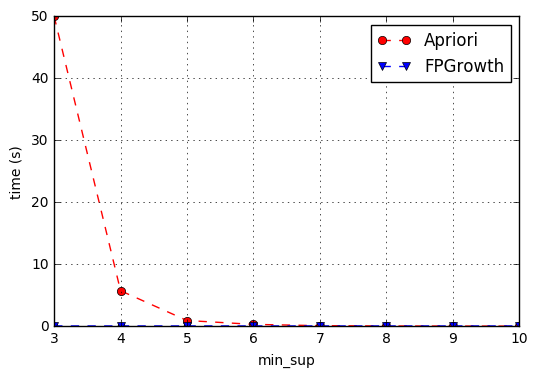

In [15]:
x = range(3, 10+1)
print(x)

y1 = []
y2 = []
for each_x in x:
    
    ap = Apriori()
    ts = time.time()
    ap.Apriori(authors_relationship_data, each_x, verbose = False)
    y1.append(time.time()-ts)
    
    fp = FPGrowth()
    ts = time.time()
    fp.run(authors_relationship_data, each_x, verbose = False)
    y2.append(time.time()-ts)

plt.axis([x[0], x[-1], 0, max(max(y2, y1))])
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.plot(x, y1, 'ro', linestyle='--', label='Apriori') 
plt.plot(x, y2, 'bv', linestyle='--', label='FPGrowth')
plt.xlabel('min_sup')
plt.ylabel('time (s)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## where one algorithm may perform better than the others, and state why.
由統計圖可以發現，Apriori在使用較低的min_sup時，跟FPGrowth相比較，會耗掉指數級時間，隨著min_sup增加，效率會提高，時間也就趨近於跟FPGrowth差不多。

備註:因為加分題第一題我找不到好測資，所以第一題的評估跟著加分第二題一起回答